In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for time series forecasting
df = pd.read_csv('CO2/export_emissions.csv', encoding='utf-8-sig', index_col=0).T
global_emissions = df.sum(axis=1)

# Create time series model
X = np.array(range(len(global_emissions))).reshape(-1, 1)
y = global_emissions.values
model = LinearRegression()
model.fit(X, y)

# Make predictions for next 10 years
future_X = np.array(range(len(global_emissions), len(global_emissions) + 10)).reshape(-1, 1)
predictions = model.predict(future_X)

# Plot actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(global_emissions.index, global_emissions.values, label='Historical Data')
plt.plot(range(len(global_emissions), len(global_emissions) + 10), predictions, 'r--', label='Predictions')
plt.title('Global CO2 Emissions: Historical Data and Future Predictions')
plt.xlabel('Time Period')
plt.ylabel('Total Emissions (MtCO2)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate model performance
mse = mean_squared_error(y, model.predict(X))
print("\nModel Performance:")
print("Mean Squared Error:", mse)
print("R-squared Score:", model.score(X, y))

TypeError: can only concatenate str (not "int") to str

**ai_message:**

I see we have a dataset of CO2 emissions across different countries and years. The data needs some cleaning as there are mixed data types in the columns. 

Would you like to:
1. Clean and analyze specific countries' emissions trends
2. Look at global emission patterns over time
3. Compare emissions between different regions
4. Something else?

Let me know what interests you and I'll help analyze that aspect of the data.

**user_message:**

Yes please

**ai_message:**

The error occurred because the dataset contains mixed data types (strings and numbers), which prevents numerical operations like summing. I will clean the dataset by ensuring all columns are numeric where applicable and handle non-numeric values appropriately.

03:56:36 - cmdstanpy - INFO - Chain [1] start processing


Cleaned DataFrame (head):
Territorial emissions in MtCO₂     1960     1961     1962     1963     1964  \
Unnamed: 1                      0.41388  0.49080  0.68859  0.70674  0.83855   
Unnamed: 2                      2.02220  2.27850  2.46170  2.08060  2.01470   
Unnamed: 3                      6.15120  6.05590  5.66100  5.41920  5.64300   
Unnamed: 4                          NaN      NaN      NaN      NaN      NaN   
Unnamed: 5                      0.54895  0.45371  1.17910  1.14970  1.22290   

Territorial emissions in MtCO₂    1965    1966     1967    1968      1969  \
Unnamed: 1                      1.0069  1.0912  1.28190  1.2234   0.94123   
Unnamed: 2                      2.1722  2.5496  2.67750  3.0692   3.24130   
Unnamed: 3                      6.5885  8.4209  8.43160  9.0502  11.26300   
Unnamed: 4                         NaN     NaN      NaN     NaN       NaN   
Unnamed: 5                      1.1862  1.5525  0.99181  1.6695   2.78310   

Territorial emissions in MtCO₂  ... 

03:56:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\GENIUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
C:\Users\GENIUS\AppData\Local\Temp\ipykernel_15936\1293228623.py:74: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=global_emissions.index[-1], periods=11, freq='Y')[1:]



Prophet Model Performance:
Mean Squared Error: 253952.48274199417


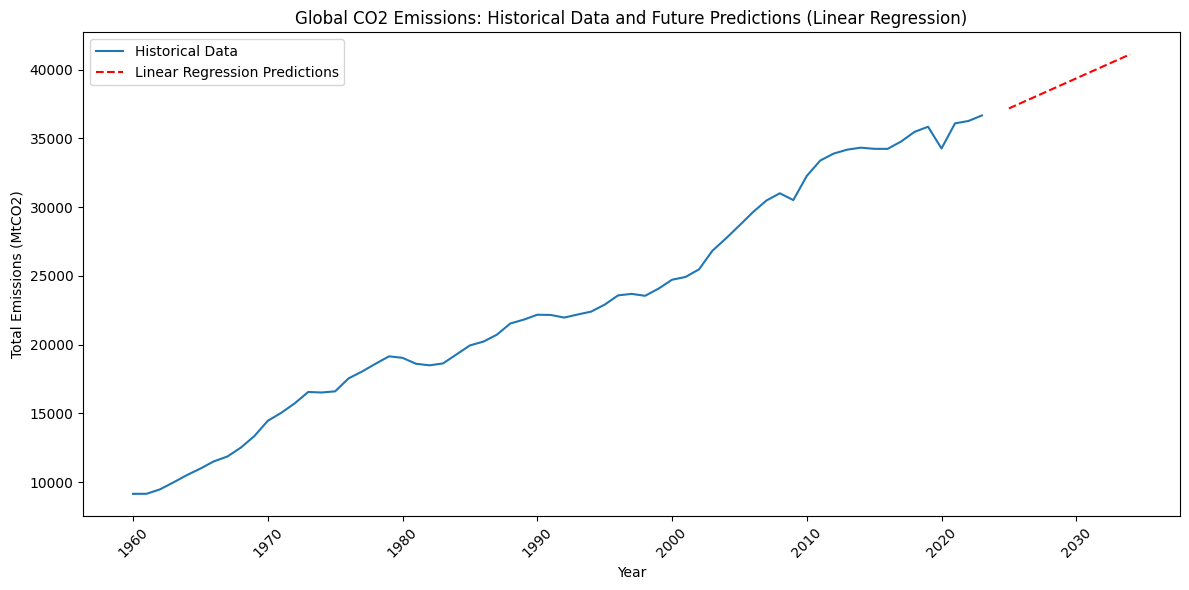

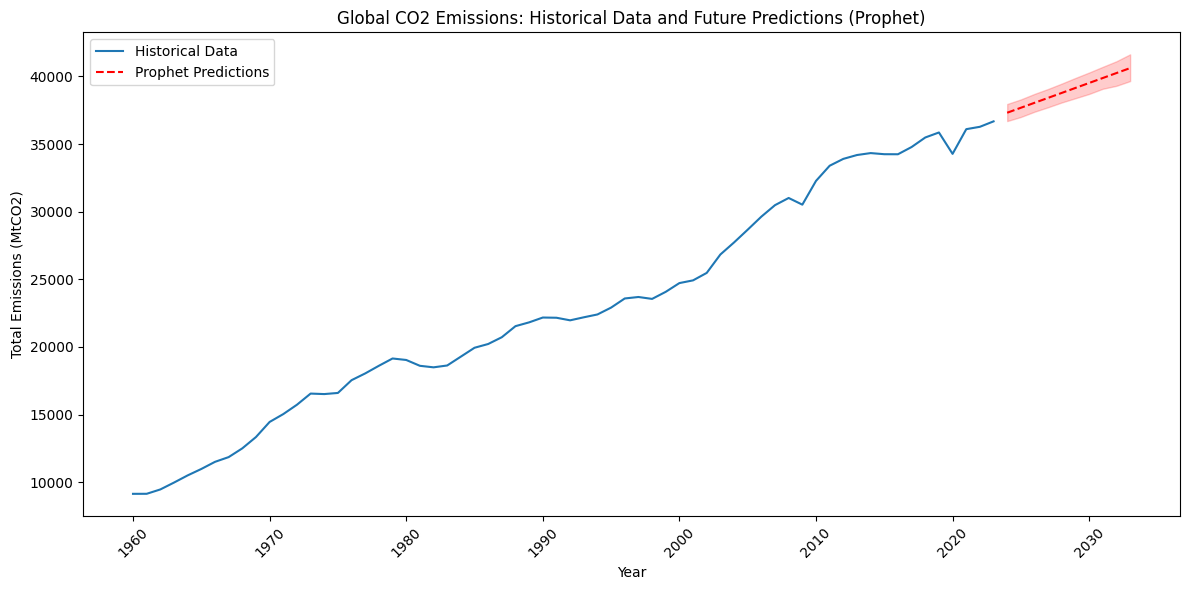

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Cleaning the dataset
def clean_emissions_data(file_path):
    # Load the data and transpose it for proper analysis
    df = pd.read_csv(file_path, encoding='utf-8-sig', index_col=0).T
    
    # Clean column names - extract years from columns
    years = [col for col in df.columns if str(col).isdigit()]
    df = df[years]
    
    # Convert all columns to numeric, coercing errors to NaN
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Drop rows and columns that are completely NaN
    df = df.dropna(how='all', axis=0)
    df = df.dropna(how='all', axis=1)
    
    return df

# Step 2: Calculate global emissions
def calculate_global_emissions(df):
    global_emissions = df.sum()
    # Convert index to datetime
    global_emissions.index = pd.to_datetime(global_emissions.index, format='%Y')
    return global_emissions

# Step 3: Linear Regression Forecasting
def linear_regression_forecast(global_emissions, forecast_years=10):
    X = np.array(range(len(global_emissions))).reshape(-1, 1)
    y = global_emissions.values
    
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    
    future_X = np.array(range(len(global_emissions), len(global_emissions) + forecast_years)).reshape(-1, 1)
    linear_predictions = linear_model.predict(future_X)
    
    # Calculate model performance
    linear_mse = mean_squared_error(y, linear_model.predict(X))
    r2_score = linear_model.score(X, y)
    
    return linear_predictions, linear_mse, r2_score

# Step 4: Prophet Forecasting
def prophet_forecast(global_emissions, forecast_years=10):
    prophet_df = pd.DataFrame({
        'ds': global_emissions.index,
        'y': global_emissions.values
    })
    
    prophet_model = Prophet(yearly_seasonality=False)
    prophet_model.fit(prophet_df)
    
    future = prophet_model.make_future_dataframe(periods=forecast_years, freq='Y')
    forecast = prophet_model.predict(future)
    
    # Calculate model performance
    historical_predictions = forecast.iloc[:len(global_emissions)]['yhat']
    prophet_mse = mean_squared_error(global_emissions.values, historical_predictions)
    
    return forecast, prophet_model, prophet_mse

# Step 5: Visualization
def plot_forecasts(global_emissions, linear_predictions, prophet_forecast_df):
    # Linear Regression Plot
    plt.figure(figsize=(12, 6))
    plt.plot(global_emissions.index, global_emissions.values, label='Historical Data')
    future_dates = pd.date_range(start=global_emissions.index[-1], periods=11, freq='Y')[1:]
    plt.plot(future_dates, linear_predictions, 'r--', label='Linear Regression Predictions')
    plt.title('Global CO2 Emissions: Historical Data and Future Predictions (Linear Regression)')
    plt.xlabel('Year')
    plt.ylabel('Total Emissions (MtCO2)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Prophet Plot
    plt.figure(figsize=(12, 6))
    plt.plot(global_emissions.index, global_emissions.values, label='Historical Data')
    plt.plot(prophet_forecast_df['ds'].iloc[len(global_emissions):], 
             prophet_forecast_df['yhat'].iloc[len(global_emissions):], 
             'r--', label='Prophet Predictions')
    plt.fill_between(prophet_forecast_df['ds'].iloc[len(global_emissions):],
                     prophet_forecast_df['yhat_lower'].iloc[len(global_emissions):],
                     prophet_forecast_df['yhat_upper'].iloc[len(global_emissions):],
                     color='r', alpha=0.2)
    plt.title('Global CO2 Emissions: Historical Data and Future Predictions (Prophet)')
    plt.xlabel('Year')
    plt.ylabel('Total Emissions (MtCO2)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # File path
    file_path = 'CO2/export_emissions.csv'
    
    # Clean data
    df = clean_emissions_data(file_path)
    print("Cleaned DataFrame (head):")
    print(df.head())
    
    # Calculate global emissions
    global_emissions = calculate_global_emissions(df)
    print("\nGlobal Emissions (head):")
    print(global_emissions.head())
    
    # Linear Regression
    linear_predictions, linear_mse, r2_score = linear_regression_forecast(global_emissions)
    print("\nLinear Regression Model Performance:")
    print("Mean Squared Error:", linear_mse)
    print("R-squared Score:", r2_score)
    
    # Prophet
    forecast, prophet_model, prophet_mse = prophet_forecast(global_emissions)
    print("\nProphet Model Performance:")
    print("Mean Squared Error:", prophet_mse)
    
    # Plot results
    plot_forecasts(global_emissions, linear_predictions, forecast)

**ai_message:**

The dataset has been cleaned, ensuring numeric operations can be performed, and global emissions have been calculated. Next, I will proceed with the time series forecasting and visualization.

03:56:46 - cmdstanpy - INFO - Chain [1] start processing



Linear Regression Performance:
Training MSE: 1039649.87
Test MSE: 3921387.71
Test MAPE: 5.26%
R-squared Score: -2.8978


03:56:47 - cmdstanpy - INFO - Chain [1] done processing



Prophet Model Performance:
Test MSE: 3683382.12
Test MAPE: 5.15%


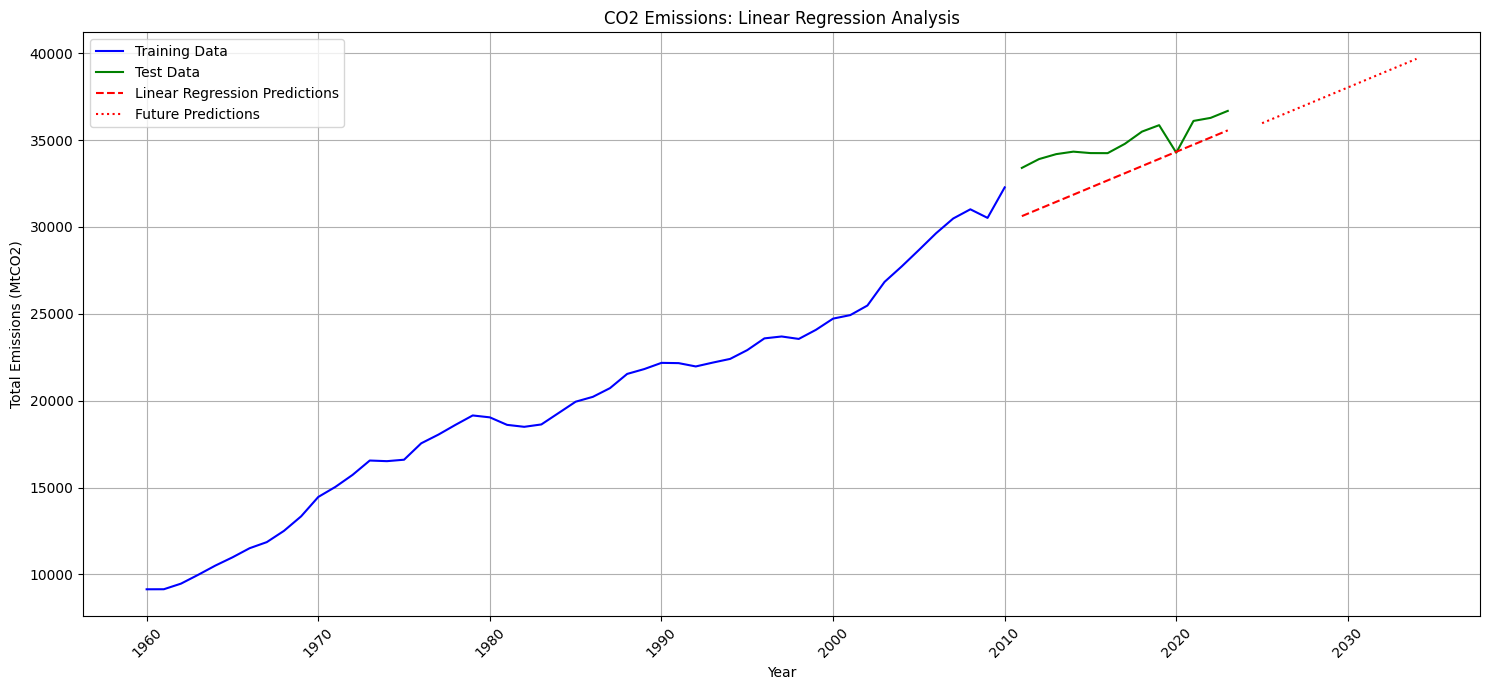

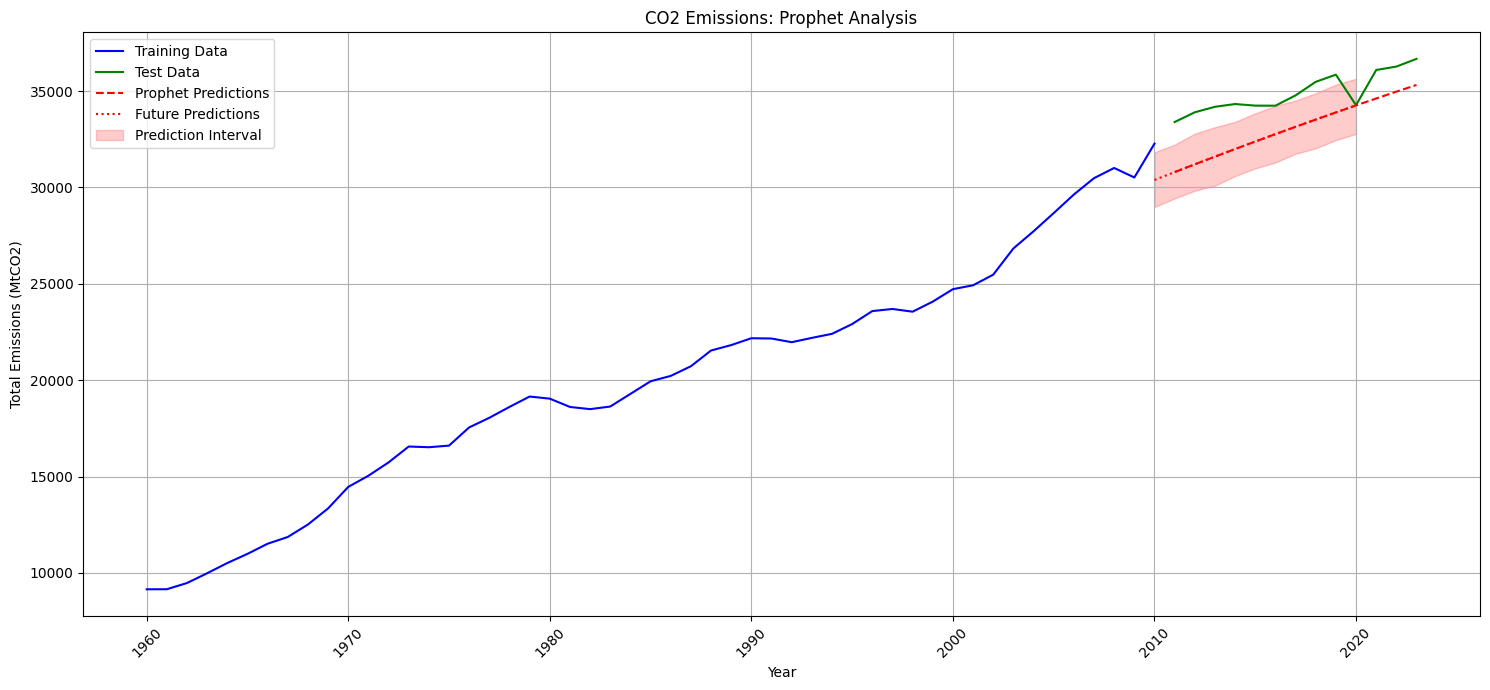

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Cleaning the dataset
def clean_emissions_data(file_path):
    df = pd.read_csv(file_path, encoding='utf-8-sig', index_col=0).T
    years = [col for col in df.columns if str(col).isdigit()]
    df = df[years]
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna(how='all', axis=0)
    df = df.dropna(how='all', axis=1)
    return df

# Step 2: Calculate global emissions
def calculate_global_emissions(df):
    global_emissions = df.sum()
    global_emissions.index = pd.to_datetime(global_emissions.index, format='%Y')
    return global_emissions

# Step 3: Split data for validation
def split_time_series(data, test_size=0.2):
    train_size = int(len(data) * (1 - test_size))
    train = data[:train_size]
    test = data[train_size:]
    return train, test

# Step 4: Enhanced Linear Regression Forecasting
def linear_regression_forecast(train_data, test_data, forecast_years=10):
    # Prepare training data
    X_train = np.array(range(len(train_data))).reshape(-1, 1)
    y_train = train_data.values
    
    # Prepare test data
    X_test = np.array(range(len(train_data), len(train_data) + len(test_data))).reshape(-1, 1)
    y_test = test_data.values
    
    # Fit model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    
    # Make predictions on test set
    test_predictions = linear_model.predict(X_test)
    
    # Calculate metrics
    train_predictions = linear_model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)
    r2_score = linear_model.score(X_test, y_test)
    
    # Future predictions
    future_X = np.array(range(len(train_data) + len(test_data), 
                             len(train_data) + len(test_data) + forecast_years)).reshape(-1, 1)
    future_predictions = linear_model.predict(future_X)
    
    return {
        'model': linear_model,
        'test_predictions': test_predictions,
        'future_predictions': future_predictions,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'test_mape': test_mape,
        'r2_score': r2_score
    }

# Step 5: Enhanced Prophet Forecasting
def prophet_forecast(train_data, test_data, forecast_years=10):
    # Prepare Prophet data
    train_df = pd.DataFrame({
        'ds': train_data.index,
        'y': train_data.values
    })
    
    # Create and tune Prophet model
    prophet_model = Prophet(
        changepoint_prior_scale=0.05,  # More flexible trend changes
        seasonality_prior_scale=0.1,   # Reduced seasonality impact
        yearly_seasonality=False,      # No yearly seasonality for annual data
        growth='logistic'              # Allow for saturation effects
    )
    
    # Add capacity for logistic growth
    max_cap = train_data.max() * 1.5  # 50% higher than historical maximum
    train_df['cap'] = max_cap
    
    # Fit model
    prophet_model.fit(train_df)
    
    # Make predictions for test period
    test_future = prophet_model.make_future_dataframe(periods=len(test_data), freq='YE')
    test_future['cap'] = max_cap
    test_forecast = prophet_model.predict(test_future)
    
    # Calculate metrics for test period
    test_predictions = test_forecast.tail(len(test_data))['yhat'].values
    test_mse = mean_squared_error(test_data.values, test_predictions)
    test_mape = mean_absolute_percentage_error(test_data.values, test_predictions)
    
    # Future predictions
    future = prophet_model.make_future_dataframe(periods=forecast_years, freq='YE')
    future['cap'] = max_cap
    forecast = prophet_model.predict(future)
    
    return {
        'model': prophet_model,
        'forecast': forecast,
        'test_predictions': test_predictions,
        'test_mse': test_mse,
        'test_mape': test_mape
    }

# Step 6: Enhanced Visualization
def plot_forecasts(train_data, test_data, linear_results, prophet_results):
    # Plot 1: Linear Regression Results
    plt.figure(figsize=(15, 7))
    plt.plot(train_data.index, train_data.values, 'b-', label='Training Data')
    plt.plot(test_data.index, test_data.values, 'g-', label='Test Data')
    plt.plot(test_data.index, linear_results['test_predictions'], 'r--', label='Linear Regression Predictions')
    
    # Future predictions
    future_dates = pd.date_range(start=test_data.index[-1], periods=11, freq='YE')[1:]
    plt.plot(future_dates, linear_results['future_predictions'], 'r:', label='Future Predictions')
    
    plt.title('CO2 Emissions: Linear Regression Analysis')
    plt.xlabel('Year')
    plt.ylabel('Total Emissions (MtCO2)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Prophet Results
    plt.figure(figsize=(15, 7))
    plt.plot(train_data.index, train_data.values, 'b-', label='Training Data')
    plt.plot(test_data.index, test_data.values, 'g-', label='Test Data')
    plt.plot(test_data.index, prophet_results['test_predictions'], 'r--', label='Prophet Predictions')
    
    # Future predictions with uncertainty intervals
    future_forecast = prophet_results['forecast'].tail(11)
    plt.plot(future_forecast['ds'], future_forecast['yhat'], 'r:', label='Future Predictions')
    plt.fill_between(future_forecast['ds'],
                     future_forecast['yhat_lower'],
                     future_forecast['yhat_upper'],
                     color='r', alpha=0.2, label='Prediction Interval')
    
    plt.title('CO2 Emissions: Prophet Analysis')
    plt.xlabel('Year')
    plt.ylabel('Total Emissions (MtCO2)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # File path
    file_path = 'CO2/export_emissions.csv'
    
    # Clean data and calculate global emissions
    df = clean_emissions_data(file_path)
    global_emissions = calculate_global_emissions(df)
    
    # Split data
    train_data, test_data = split_time_series(global_emissions)
    
    # Run enhanced linear regression
    linear_results = linear_regression_forecast(train_data, test_data)
    print("\nLinear Regression Performance:")
    print(f"Training MSE: {linear_results['train_mse']:.2f}")
    print(f"Test MSE: {linear_results['test_mse']:.2f}")
    print(f"Test MAPE: {linear_results['test_mape']:.2%}")
    print(f"R-squared Score: {linear_results['r2_score']:.4f}")
    
    # Run enhanced Prophet model
    prophet_results = prophet_forecast(train_data, test_data)
    print("\nProphet Model Performance:")
    print(f"Test MSE: {prophet_results['test_mse']:.2f}")
    print(f"Test MAPE: {prophet_results['test_mape']:.2%}")
    
    # Plot results
    plot_forecasts(train_data, test_data, linear_results, prophet_results)

Dataset Overview:
   Year  Glob  NHem  SHem  24N-90N  24S-24N  90S-24S  64N-90N  44N-64N  \
0  1880 -0.18 -0.31 -0.05    -0.42    -0.13    -0.01    -0.82    -0.53   
1  1881 -0.10 -0.20  0.00    -0.39     0.10    -0.07    -0.95    -0.51   
2  1882 -0.12 -0.23 -0.01    -0.34    -0.05     0.01    -1.43    -0.32   
3  1883 -0.18 -0.30 -0.07    -0.38    -0.16    -0.01    -0.19    -0.59   
4  1884 -0.29 -0.44 -0.15    -0.63    -0.15    -0.14    -1.31    -0.67   

   24N-44N  EQU-24N  24S-EQU  44S-24S  64S-44S  90S-64S  
0    -0.34    -0.14    -0.11    -0.04     0.05     0.68  
1    -0.24     0.11     0.10    -0.05    -0.07     0.60  
2    -0.18    -0.04    -0.05     0.01     0.04     0.63  
3    -0.29    -0.17    -0.16    -0.04     0.07     0.51  
4    -0.49    -0.12    -0.17    -0.19    -0.02     0.66  

Basic Statistics:
              Year        Glob        NHem        SHem     24N-90N  \
count   145.000000  145.000000  145.000000  145.000000  145.000000   
mean   1952.000000    0.073724

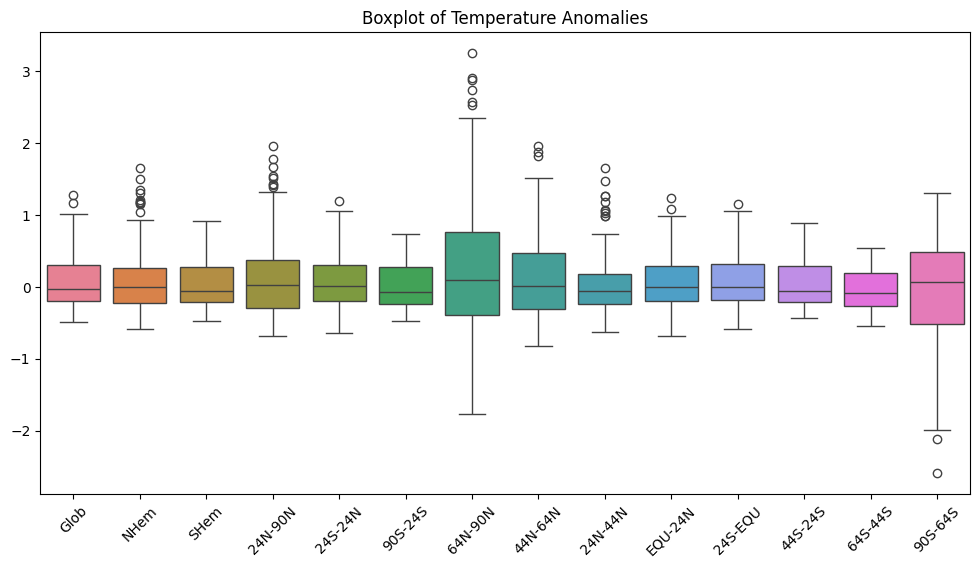

03:22:41 - cmdstanpy - INFO - Chain [1] start processing
03:22:41 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\GENIUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


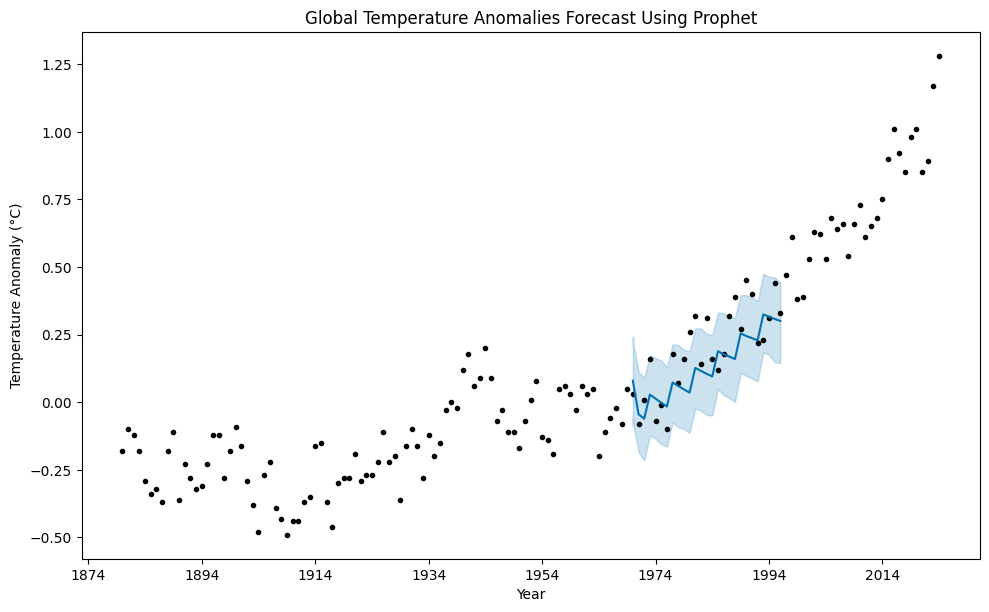

Model Mean Squared Error: 0.0135
Prediction for 2050 is not available.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

# Read the data
df = pd.read_csv('Temperature/ZonAnn.Ts+dSST.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:])  # Exclude 'Year' column for visualization
plt.title("Boxplot of Temperature Anomalies")
plt.xticks(rotation=45)
plt.show()

# Prepare data for Prophet
prophet_df = df[['Year', 'Glob']].rename(columns={'Year': 'ds', 'Glob': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create future dataframe up to 2050
future = model.make_future_dataframe(periods=2050 - df['Year'].max(), freq='Y')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Global Temperature Anomalies Forecast Using Prophet")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error

# Get Prophet's predictions for existing data (training set)
forecast_train = model.predict(prophet_df)

# Calculate MSE between actual and predicted values
mse = mean_squared_error(prophet_df['y'], forecast_train['yhat'])

print(f"Model Mean Squared Error: {mse:.4f}")

# Extract prediction for 2050
forecast['year'] = forecast['ds'].dt.year
predicted_2050 = forecast.loc[forecast['year'] == 2050, 'yhat']

if not predicted_2050.empty:
    print(f"Predicted temperature anomaly for 2050: {predicted_2050.values[0]:.2f}°C")
else:
    print("Prediction for 2050 is not available.")


Dataset Overview:
   Year  Glob  NHem  SHem  24N-90N  24S-24N  90S-24S  64N-90N  44N-64N  \
0  1880 -0.18 -0.31 -0.05    -0.42    -0.13    -0.01    -0.82    -0.53   
1  1881 -0.10 -0.20  0.00    -0.39     0.10    -0.07    -0.95    -0.51   
2  1882 -0.12 -0.23 -0.01    -0.34    -0.05     0.01    -1.43    -0.32   
3  1883 -0.18 -0.30 -0.07    -0.38    -0.16    -0.01    -0.19    -0.59   
4  1884 -0.29 -0.44 -0.15    -0.63    -0.15    -0.14    -1.31    -0.67   

   24N-44N  EQU-24N  24S-EQU  44S-24S  64S-44S  90S-64S  
0    -0.34    -0.14    -0.11    -0.04     0.05     0.68  
1    -0.24     0.11     0.10    -0.05    -0.07     0.60  
2    -0.18    -0.04    -0.05     0.01     0.04     0.63  
3    -0.29    -0.17    -0.16    -0.04     0.07     0.51  
4    -0.49    -0.12    -0.17    -0.19    -0.02     0.66  

Basic Statistics:
              Year        Glob        NHem        SHem     24N-90N  \
count   145.000000  145.000000  145.000000  145.000000  145.000000   
mean   1952.000000    0.073724

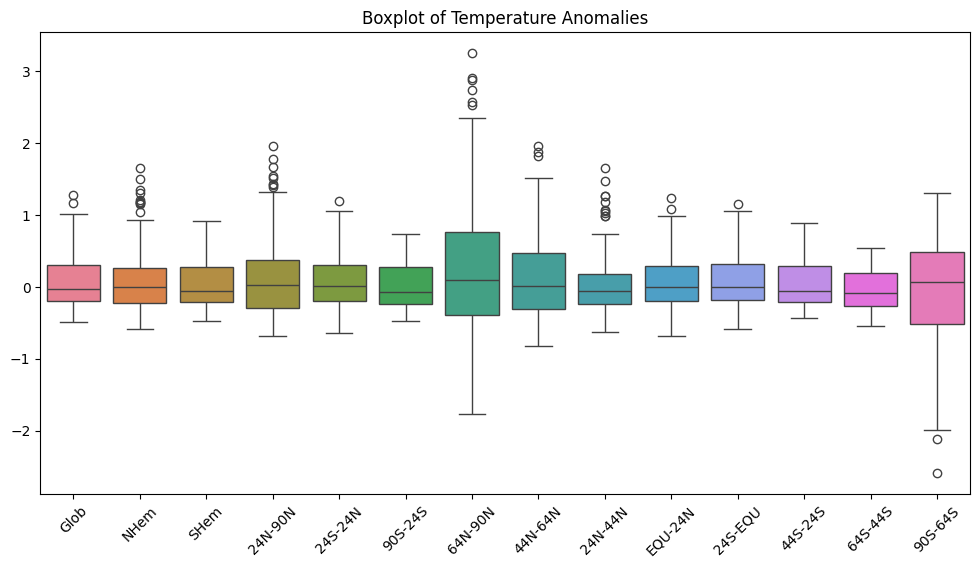

03:56:59 - cmdstanpy - INFO - Chain [1] start processing
03:56:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\GENIUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


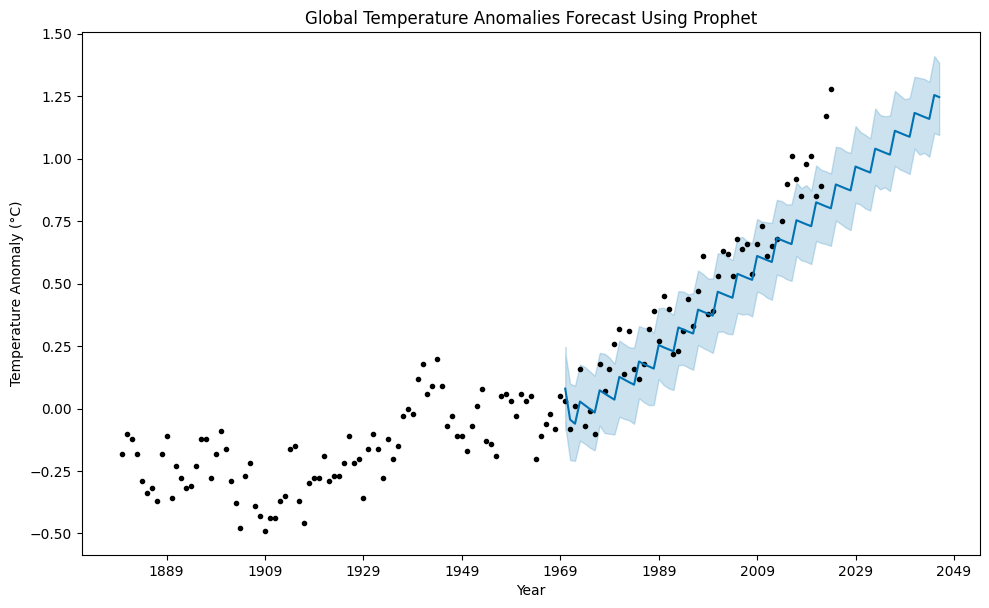


Model Mean Squared Error: 0.0135



Enter the year to predict the temperature anomaly (e.g., 2050):  2034


Predicted temperature anomaly for 2034: 1.02°C


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Read the data
df = pd.read_csv('Temperature/ZonAnn.Ts+dSST.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:])  # Exclude 'Year' column for visualization
plt.title("Boxplot of Temperature Anomalies")
plt.xticks(rotation=45)
plt.show()

# Prepare data for Prophet
prophet_df = df[['Year', 'Glob']].rename(columns={'Year': 'ds', 'Glob': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create future dataframe up to 2100 (or any desired year)
future = model.make_future_dataframe(periods=2100 - df['Year'].max(), freq='Y')
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Global Temperature Anomalies Forecast Using Prophet")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid()
plt.show()

# Calculate MSE for the training set
forecast_train = model.predict(prophet_df)
mse = mean_squared_error(prophet_df['y'], forecast_train['yhat'])
print(f"\nModel Mean Squared Error: {mse:.4f}")

# Function to predict temperature anomaly for a specific year
def predict_temperature(year):
    forecast['year'] = forecast['ds'].dt.year
    predicted_value = forecast.loc[forecast['year'] == year, 'yhat']
    
    if not predicted_value.empty:
        return predicted_value.values[0]
    else:
        return None

# Take user input for the year to predict
while True:
    try:
        user_year = int(input("\nEnter the year to predict the temperature anomaly (e.g., 2050): "))
        if user_year < df['Year'].min() or user_year > 2100:
            print(f"Please enter a year between {df['Year'].min()} and 2100.")
        else:
            predicted_temp = predict_temperature(user_year)
            if predicted_temp is not None:
                print(f"Predicted temperature anomaly for {user_year}: {predicted_temp:.2f}°C")
            else:
                print(f"No prediction available for the year {user_year}.")
            break
    except ValueError:
        print("Invalid input. Please enter a valid year (e.g., 2050).")

Dataset Overview:
   Year  Glob  NHem  SHem  24N-90N  24S-24N  90S-24S  64N-90N  44N-64N  \
0  1880 -0.18 -0.31 -0.05    -0.42    -0.13    -0.01    -0.82    -0.53   
1  1881 -0.10 -0.20  0.00    -0.39     0.10    -0.07    -0.95    -0.51   
2  1882 -0.12 -0.23 -0.01    -0.34    -0.05     0.01    -1.43    -0.32   
3  1883 -0.18 -0.30 -0.07    -0.38    -0.16    -0.01    -0.19    -0.59   
4  1884 -0.29 -0.44 -0.15    -0.63    -0.15    -0.14    -1.31    -0.67   

   24N-44N  EQU-24N  24S-EQU  44S-24S  64S-44S  90S-64S  
0    -0.34    -0.14    -0.11    -0.04     0.05     0.68  
1    -0.24     0.11     0.10    -0.05    -0.07     0.60  
2    -0.18    -0.04    -0.05     0.01     0.04     0.63  
3    -0.29    -0.17    -0.16    -0.04     0.07     0.51  
4    -0.49    -0.12    -0.17    -0.19    -0.02     0.66  

Basic Statistics:
              Year        Glob        NHem        SHem     24N-90N  \
count   145.000000  145.000000  145.000000  145.000000  145.000000   
mean   1952.000000    0.073724

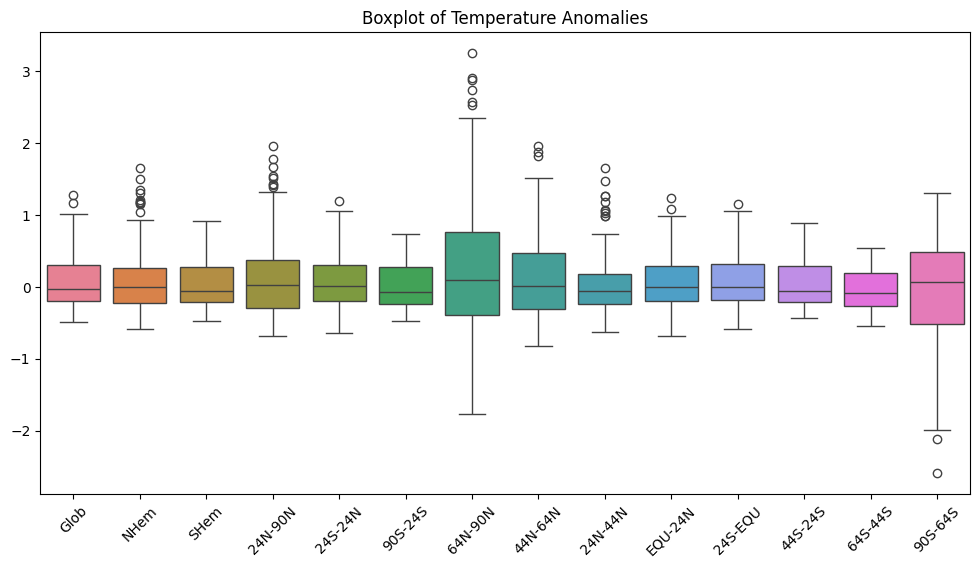

03:57:18 - cmdstanpy - INFO - Chain [1] start processing
03:57:18 - cmdstanpy - INFO - Chain [1] done processing


Enter the year to predict temperature anomaly (e.g., 2050):  2044


C:\Users\GENIUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Predicted temperature anomaly for 2044: 1.25°C


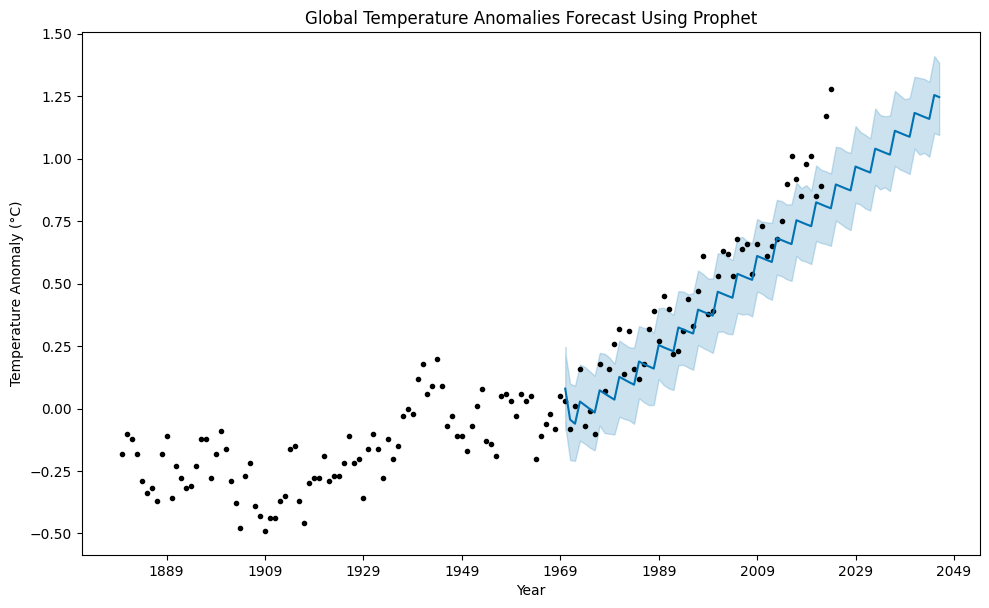

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Read the data
df = pd.read_csv('Temperature/ZonAnn.Ts+dSST.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:])  # Exclude 'Year' column for visualization
plt.title("Boxplot of Temperature Anomalies")
plt.xticks(rotation=45)
plt.show()

# Prepare data for Prophet
prophet_df = df[['Year', 'Glob']].rename(columns={'Year': 'ds', 'Glob': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Function to predict temperature anomaly for any given year
def predict_temperature(year):
    required_years = year - df['Year'].max()  # Ensure we generate enough years
    if required_years <= 0:
        print(f"The year {year} is within the dataset. No prediction needed.")
        return None
    
    # Generate enough future years dynamically
    future = model.make_future_dataframe(periods=required_years + 5, freq='Y')  # Add buffer
    forecast = model.predict(future)
    forecast['year'] = forecast['ds'].dt.year  # Extract years

    # Get the prediction for the requested year
    predicted_value = forecast.loc[forecast['year'] == year, 'yhat']
    
    if not predicted_value.empty:
        return predicted_value.values[0]
    else:
        return None

# Take user input for year prediction
while True:
    try:
        user_year = int(input("Enter the year to predict temperature anomaly (e.g., 2050): "))
        
        if user_year < df['Year'].min():
            print(f"Please enter a year greater than or equal to {df['Year'].min()}.")
        else:
            predicted_temp = predict_temperature(user_year)
            if predicted_temp is not None:
                print(f"Predicted temperature anomaly for {user_year}: {predicted_temp:.2f}°C")
            else:
                print(f"No prediction available for the year {user_year}.")
            break
    except ValueError:
        print("Invalid input. Please enter a valid year (e.g., 2050).")


# Plot the forecast
fig = model.plot(forecast)
plt.title("Global Temperature Anomalies Forecast Using Prophet")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid()
plt.show()


Linear Regression Performance:
Training MSE: 1039649.87
Test MSE: 3921387.71
Test MAPE: 5.26%
R-squared Score: -2.8978



Enter the year to predict CO2 emissions (e.g., 2050):  2048


04:12:11 - cmdstanpy - INFO - Chain [1] start processing
04:12:11 - cmdstanpy - INFO - Chain [1] done processing



Prophet Model Performance:
Test MSE: 3683382.12
Test MAPE: 5.15%
Prediction failed for 2048. Check if the year is within 2100.


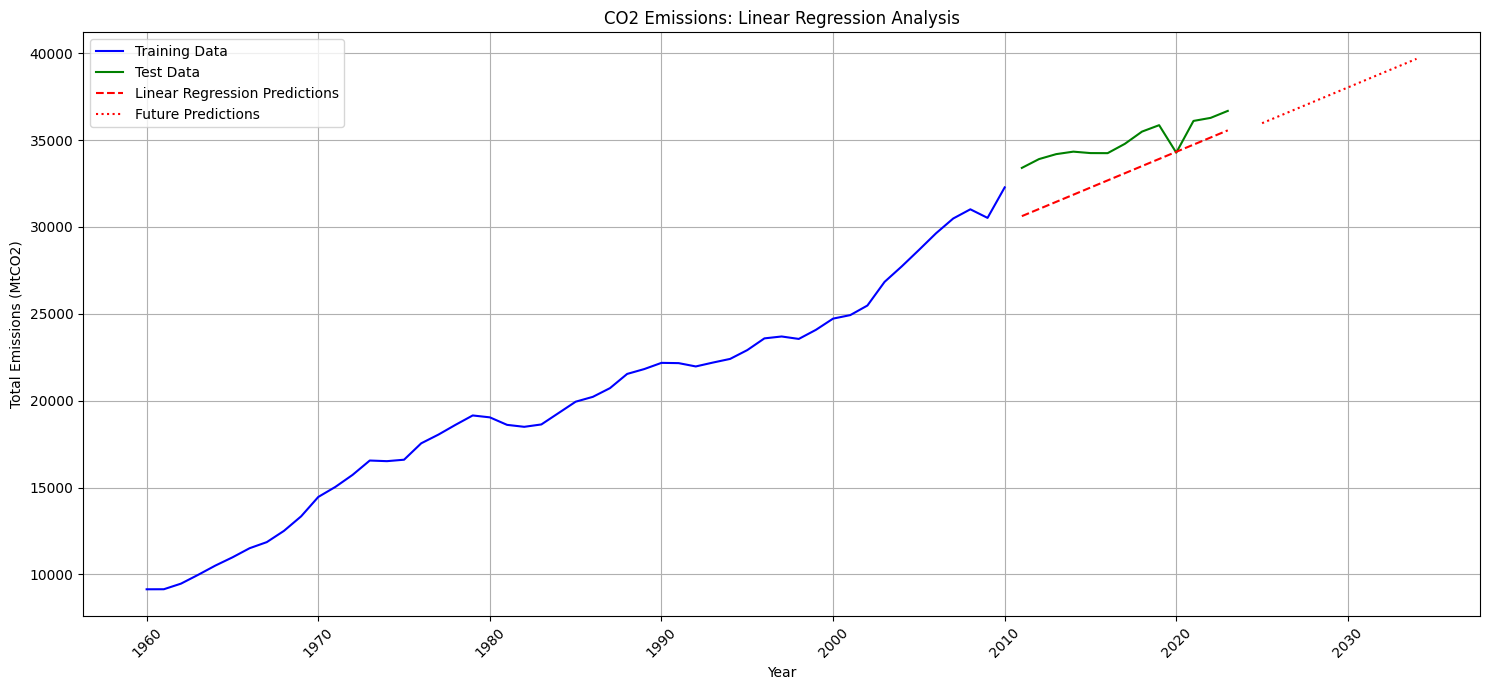

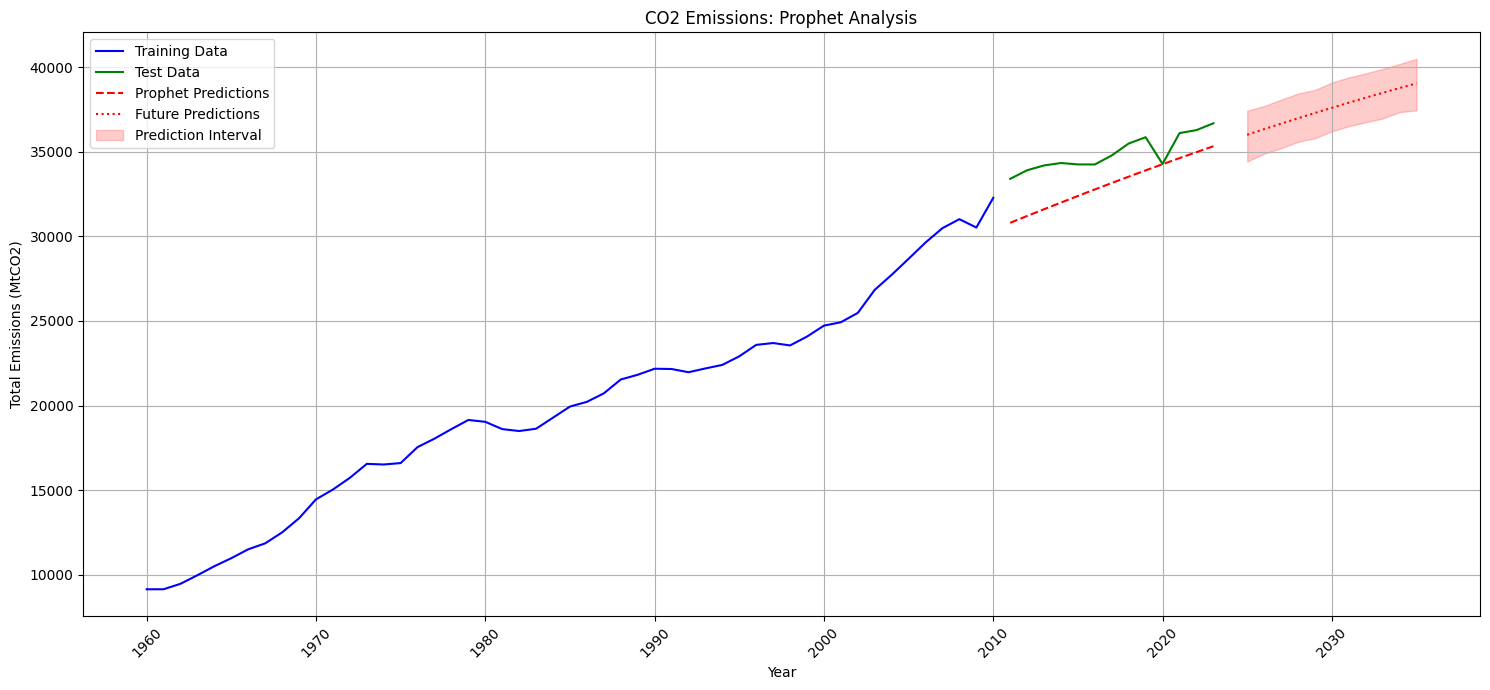

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Cleaning the dataset
def clean_emissions_data(file_path):
    df = pd.read_csv(file_path, encoding='utf-8-sig', index_col=0).T
    years = [col for col in df.columns if str(col).isdigit()]
    df = df[years]
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.dropna(how='all', axis=0)
    df = df.dropna(how='all', axis=1)
    return df

# Step 2: Calculate global emissions
def calculate_global_emissions(df):
    global_emissions = df.sum()
    global_emissions.index = pd.to_datetime(global_emissions.index, format='%Y')
    return global_emissions

# Step 3: Split data for validation
def split_time_series(data, test_size=0.2):
    train_size = int(len(data) * (1 - test_size))
    train = data[:train_size]
    test = data[train_size:]
    return train, test

# Step 4: Enhanced Linear Regression Forecasting
def linear_regression_forecast(train_data, test_data, forecast_years=10):
    # Prepare training data
    X_train = np.array(range(len(train_data))).reshape(-1, 1)
    y_train = train_data.values
    
    # Prepare test data
    X_test = np.array(range(len(train_data), len(train_data) + len(test_data))).reshape(-1, 1)
    y_test = test_data.values
    
    # Fit model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    
    # Make predictions on test set
    test_predictions = linear_model.predict(X_test)
    
    # Calculate metrics
    train_predictions = linear_model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)
    r2_score = linear_model.score(X_test, y_test)
    
    # Future predictions
    future_X = np.array(range(len(train_data) + len(test_data), 
                             len(train_data) + len(test_data) + forecast_years)).reshape(-1, 1)
    future_predictions = linear_model.predict(future_X)
    
    return {
        'model': linear_model,
        'test_predictions': test_predictions,
        'future_predictions': future_predictions,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'test_mape': test_mape,
        'r2_score': r2_score
    }

# Step 5: Enhanced Prophet Forecasting
def prophet_forecast(train_data, test_data, forecast_years=10):
    # Prepare Prophet data
    train_df = pd.DataFrame({
        'ds': train_data.index,
        'y': train_data.values
    })
    
    # Create and tune Prophet model
    prophet_model = Prophet(
        changepoint_prior_scale=0.05,  # More flexible trend changes
        seasonality_prior_scale=0.1,   # Reduced seasonality impact
        yearly_seasonality=False,      # No yearly seasonality for annual data
        growth='logistic'              # Allow for saturation effects
    )
    
    # Add capacity for logistic growth
    max_cap = train_data.max() * 1.5  # 50% higher than historical maximum
    train_df['cap'] = max_cap
    
    # Fit model
    prophet_model.fit(train_df)
    
    # Make predictions for test period
    test_future = prophet_model.make_future_dataframe(periods=len(test_data), freq='YE')
    test_future['cap'] = max_cap
    test_forecast = prophet_model.predict(test_future)
    
    # Calculate metrics for test period
    test_predictions = test_forecast.tail(len(test_data))['yhat'].values
    test_mse = mean_squared_error(test_data.values, test_predictions)
    test_mape = mean_absolute_percentage_error(test_data.values, test_predictions)
    
    # Future predictions
    future = prophet_model.make_future_dataframe(periods=forecast_years, freq='YE')
    future['cap'] = max_cap
    forecast = prophet_model.predict(future)
    
    return {
        'model': prophet_model,
        'forecast': forecast,
        'test_predictions': test_predictions,
        'test_mse': test_mse,
        'test_mape': test_mape
    }

# Step 6: Enhanced Visualization
def plot_forecasts(train_data, test_data, linear_results, prophet_results):
    # Plot 1: Linear Regression Results
    plt.figure(figsize=(15, 7))
    plt.plot(train_data.index, train_data.values, 'b-', label='Training Data')
    plt.plot(test_data.index, test_data.values, 'g-', label='Test Data')
    plt.plot(test_data.index, linear_results['test_predictions'], 'r--', label='Linear Regression Predictions')
    
    # Future predictions
    future_dates = pd.date_range(start=test_data.index[-1], periods=11, freq='YE')[1:]
    plt.plot(future_dates, linear_results['future_predictions'], 'r:', label='Future Predictions')
    
    plt.title('CO2 Emissions: Linear Regression Analysis')
    plt.xlabel('Year')
    plt.ylabel('Total Emissions (MtCO2)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Prophet Results
    plt.figure(figsize=(15, 7))
    plt.plot(train_data.index, train_data.values, 'b-', label='Training Data')
    plt.plot(test_data.index, test_data.values, 'g-', label='Test Data')
    plt.plot(test_data.index, prophet_results['test_predictions'], 'r--', label='Prophet Predictions')
    
    # Future predictions with uncertainty intervals
    future_forecast = prophet_results['forecast'].tail(11)
    plt.plot(future_forecast['ds'], future_forecast['yhat'], 'r:', label='Future Predictions')
    plt.fill_between(future_forecast['ds'],
                     future_forecast['yhat_lower'],
                     future_forecast['yhat_upper'],
                     color='r', alpha=0.2, label='Prediction Interval')
    
    plt.title('CO2 Emissions: Prophet Analysis')
    plt.xlabel('Year')
    plt.ylabel('Total Emissions (MtCO2)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main execution
# Main execution
if __name__ == "__main__":
    # File path
    file_path = 'CO2/export_emissions.csv'
    
    # Clean data and calculate global emissions
    df = clean_emissions_data(file_path)
    global_emissions = calculate_global_emissions(df)
    
    # Split data
    train_data, test_data = split_time_series(global_emissions)
    
    # Run enhanced linear regression
    linear_results = linear_regression_forecast(train_data, test_data)
    print("\nLinear Regression Performance:")
    print(f"Training MSE: {linear_results['train_mse']:.2f}")
    print(f"Test MSE: {linear_results['test_mse']:.2f}")
    print(f"Test MAPE: {linear_results['test_mape']:.2%}")
    print(f"R-squared Score: {linear_results['r2_score']:.4f}")
    
    # Get the last year in the training and test data
    last_train_year = train_data.index.year.max()
    last_test_year = last_train_year + len(test_data)  # End of test data
    
    # Take user input for the prediction year
    while True:
        try:
            user_year = int(input("\nEnter the year to predict CO2 emissions (e.g., 2050): "))
            
            if user_year <= last_train_year:
                print(f"Error: The training data ends at {last_train_year}. Enter a future year.")
                continue
            else:
                # Calculate forecast years needed
                if user_year <= last_test_year:
                    # Year is within the test period
                    forecast_years = 0  # No extra years needed beyond the test data
                else:
                    # Year is beyond the test period
                    forecast_years = user_year - last_test_year
                
                # Run Prophet model with dynamic forecast period
                prophet_results = prophet_forecast(train_data, test_data, forecast_years=forecast_years)
                print("\nProphet Model Performance:")
                print(f"Test MSE: {prophet_results['test_mse']:.2f}")
                print(f"Test MAPE: {prophet_results['test_mape']:.2%}")
                
                # Extract the prediction for the user's year
                forecast_df = prophet_results['forecast']
                forecast_df['year'] = forecast_df['ds'].dt.year
                prediction = forecast_df.loc[forecast_df['year'] == user_year, 'yhat']
                
                if not prediction.empty:
                    print(f"\nPredicted CO2 emissions for {user_year}: {prediction.values[0]:.2f} MtCO2")
                else:
                    print(f"Prediction failed for {user_year}. Check if the year is within 2100.")
                break
                
        except ValueError:
            print("Invalid input. Please enter a valid year (e.g., 2050).")
    
    # Plot results
    plot_forecasts(train_data, test_data, linear_results, prophet_results)

In [3]:
pip install dash


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached dash-2.18.2-py3-none-any.whl.metadata (10 kB)
  Using cached importlib_metadata-8.6.1-py3-none-any.whl.metadata (4.7 kB)
Using cached dash-2.18.2-py3-none-any.whl (7.8 MB)
Using cached importlib_metadata-8.6.1-py3-none-any.whl (26 kB)
